In [1]:
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

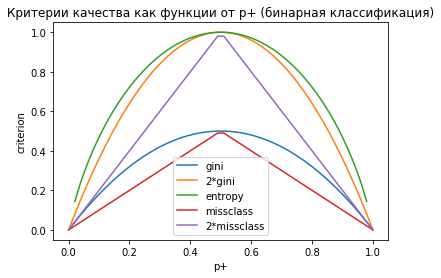

In [2]:
# Отрисовка картинки

plt.rcParams['figure.figsize'] = (6,4)
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Критерии качества как функции от p+ (бинарная классификация)')
plt.legend();

In [3]:
# Генерируем синтетические данные.
# Два класса будут сгенерированы из двух нормальных распределений с разными средними.

# первый класс
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

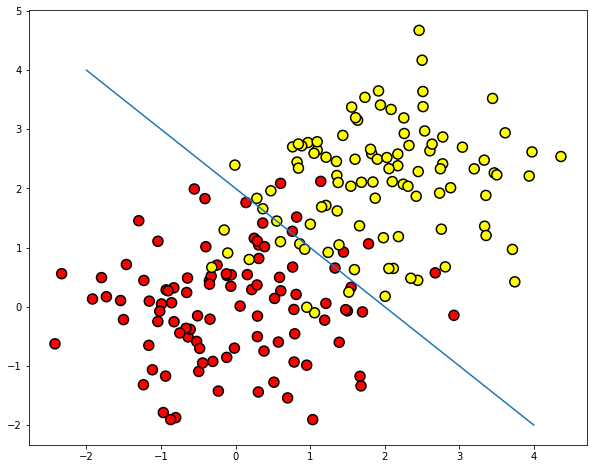

In [4]:
# Отрисовка точек

plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

In [7]:
# обучаем дерево
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

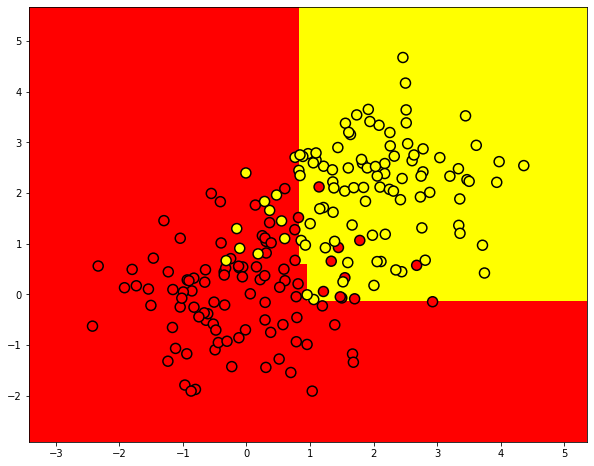

In [8]:
# Отрисовка разделящей поверхности

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

In [9]:
# Отрисовка дерева

# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
out_file='../img/small_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng '../img/small_tree.dot' -o '../img/small_tree.png'

In [10]:
data = pd.read_csv('credit_scoring_train.csv')
data.info()
data = data.dropna()
data2 = data
print(data.shape)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 11 columns):
client_id                75000 non-null int64
DIR                      75000 non-null float64
Age                      75000 non-null float64
NumLoans                 75000 non-null int64
NumRealEstateLoans       75000 non-null int64
NumDependents            73084 non-null float64
Num30-59Delinquencies    75000 non-null int64
Num60-89Delinquencies    75000 non-null int64
Income                   60153 non-null float64
BalanceToCreditLimit     75000 non-null float64
Delinquent90             75000 non-null int64
dtypes: float64(5), int64(6)
memory usage: 6.3 MB
(60153, 11)


,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
0,0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028,0
1,1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679,0
4,4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350,0
5,5,0.121965,73.5,18,1,1.0,0,0,15634.752299,0.004951,0
6,6,0.461193,71.3,9,0,0.0,0,0,3562.767475,0.039618,0


In [11]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Age'].values.reshape(-1, 1), data['Delinquent90'].values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [12]:
export_graphviz(age_tree, feature_names=['Age'], 
out_file='../img/age_tree.dot', filled=True)
!dot -Tpng '../img/age_tree.dot' -o '../img/age_tree.png'

In [13]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Age', 'Income']].values, data2['Delinquent90'].values);

export_graphviz(age_sal_tree, feature_names=['Age', 'Income'], 
out_file='../img/age_sal_tree.dot', filled=True)
!dot -Tpng '../img/age_sal_tree.dot' -o '../img/age_sal_tree.png'


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.134452 to fit
